<a href="https://colab.research.google.com/github/daheeem/Genetic-Algoritm/blob/main/Fuzzy_Logic_Data_Bengkel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FUZZY LOGIC**

In [2]:
import numpy as np


In [1]:
#Mengimport data dari file bengkel.xlsx
from google.colab import files
TheFile = files.upload()

Saving bengkel.xlsx to bengkel.xlsx


In [3]:
#Membaca file bengkel.xlsx
import pandas as pd
data = pd.read_excel('bengkel.xlsx')
print(data)

     id  servis  harga
0     1      58      7
1     2      54      1
2     3      98      2
3     4      52      4
4     5      11      4
..  ...     ...    ...
95   96      30      1
96   97      25      3
97   98      27     10
98   99       8      6
99  100      11      8

[100 rows x 3 columns]


DESKRIPSI TUGAS

Diberikan file bengkel.xlsx berupa himpunan data 100 bengkel mobil yang ada di kota Bandung dengan dua atribut: Kualitas Servis (bilangan real 1-100; semakin tinggi semakin baik) dan Harga (bilangan real 1-10, semakin tinggi semakin mahal). Bangunlah sebuah sistem berbasis Fuzzy Logic untuk memilih 10 bengkel terbaik di kota Bandung. Sistem membaca masukan file bengkel.xlsx dan mengeluarkan output berupa sebuah file peringkat.xlsx yang berisi 10 nomor/ID 
bengkel terbaik beserta skor-nya (output Defuzzification).



***INPUT DAN OUTPUT***

**Nilai Linguistik (INPUT)**

Kualitas Servis : Sangat Memuaskan, Memuaskan, Kurang Memuaskan, Tidak Memuaskan

Harga :  Mahal, Normal, Murah

**Nilai Linguistik (OUTPUT)**

Nilai Kelayakan : Baik, Standar, Buruk


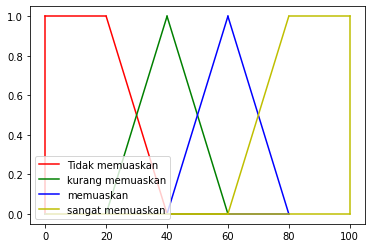

In [4]:
#Membuat grafik 
import matplotlib.pyplot as plt

servis = {
    'Tidak memuaskan' : [0.00, 0.00, 20.00,40.00 ],
    'kurang memuaskan' : [20.00, 40.00 , 40.00, 60.00],
    'memuaskan' : [40.00, 60.00, 60.00, 80.00],
    'sangat memuaskan' : [60.00, 80.00, 100.00, 100.00],
}

Harga = {
    'Murah' : [0.00, 0.00, 2.50, 5.00],
    'Normal' : [2.50, 5.00, 5.00, 7.50],
    'Mahal' : [5.00, 7.50, 10.00, 10.00]
}

def nilai(batas, warna, label=' ', min=0, max=1):
  y = [0,1,1,0]
  plt.plot((min,batas[0]), (0,0), warna)
  for i in range(len(batas)-1):
    plt.plot((batas[i], batas[i+1]), (y[i], y[i+1]), warna)
  plt.plot((batas[-1], max), (0,0), warna, label=label)

def grafik(membership, min = 0, max=1):
  warna = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
  i = 0
  for j in membership:
    nilai(membership[j], warna[i], j, min=min, max=max)
    i += 1
  plt.legend(loc=3)
  plt.show

grafik(servis)

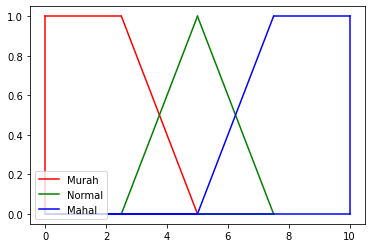

In [5]:
grafik(Harga)

**FUZZIFICATION**


In [6]:
#Fuzifikasi kualitas servis
#Nilai linguistik = Sangat Memuaskan, Memuaskan, Kurang memuaskan, Tidak Memuaskan

def fuzifikasiKualitasServis(servis):
  hasil = [["Tidak Memuaskan",0], ["Kurang Memuaskan",0], ["Memuaskan",0], ["Sangat Memuaskan",0]]

  if servis <= 20:
    hasil[0][1] = 1
  elif servis > 20 and servis < 40:
    x = (40 - servis)/(40 - 20)
    y = (servis - 20)/(40 - 20)
    hasil[0][1] = x
    hasil[1][1] = y
  elif servis == 40:
    hasil[1][1] = 1
  elif servis > 40 and servis < 60:
    x = (60 - servis)/(60 - 40)
    y = (servis - 40)/(60 - 40)
    hasil[1][1] = x
    hasil[2][1] = y
  elif servis == 60:
    hasil[2][1] = 1
  elif servis > 60 and servis < 80:
    x = (80 - servis)/(80 - 60)
    y = (servis - 60)/(80 - 60)
    hasil[2][1] = x
    hasil[3][1] = y
  elif servis >= 80:
    hasil[3][1] = 1

  return hasil

In [7]:
#Fuzifikasi Harga
#Nilai linguistik = Mahal, Normal, Murah
def fuzifikasiHarga(harga):
  hasil = [["Murah",0], ["Normal",0], ["Mahal",0],]
  if harga <= 2.5:
    hasil[0][1] = 1
  elif harga > 2.5 and harga < 5:
    x = (5 - harga)/(5 - 2.5)
    y = (harga - 2.5)/(5 - 2.5)
    hasil[0][1] = x
    hasil[1][1] = y
  elif harga == 5:
    hasil[1][1] = 1
  elif harga > 5 and harga < 7.5:
    x = (7.5 - harga)/(7.5 - 5)
    y = (harga - 5)/(7.5 - 5)
    hasil[1][1] = x
    hasil[2][1] = y
  elif harga >= 7.5:
    hasil[2][1] = 1

  return hasil

**INFERENSI** 

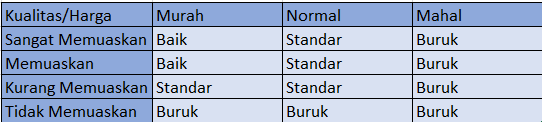

In [8]:
#Konjungsi Nilai kelayakan = Baik
def conjunctionbaik(fuzharga, fuzkualitas):
  baik = []
  if (fuzharga[0][0] == "Murah" and fuzkualitas[2][0] == "Memuaskan"):
    if fuzharga[0][1] < fuzkualitas[2][1]:
      nilai = fuzharga[0][1]
    else:
      nilai = fuzkualitas[2][1]
    baik.append(nilai)
  if (fuzharga[0][0] == "Murah" and fuzkualitas[3][0] == "Sangat Memuaskan"):
    if fuzharga[0][1] < fuzkualitas[3][1]:
      nilai = fuzharga[0][1]
    else:
      nilai = fuzkualitas[3][1]
    baik.append(nilai)

  return baik

In [9]:
#Konjungsi Nilai kelayakan = Standar
def conjunctionstandar(fuzharga, fuzkualitas):
  standar = []

  if (fuzharga[0][0] == "Murah" and fuzkualitas[1][0] == "Kurang Memuaskan"):
    if fuzharga[0][1] < fuzkualitas[1][1]:
      nilai = fuzharga[0][1]
    else:
      nilai = fuzkualitas[1][1]
    standar.append(nilai)
  if (fuzharga[1][0] == "Normal" and fuzkualitas[1][0] == "Kurang Memuaskan"):
    if fuzharga[1][1] < fuzkualitas[1][1]:
      nilai = fuzharga[1][1]
    else:
      nilai = fuzkualitas[1][1]
    standar.append(nilai)  
  if (fuzharga[1][0] == "Normal" and fuzkualitas[2][0] == "Memuaskan"):
    if fuzharga[1][1] < fuzkualitas[2][1]:
      nilai = fuzharga[1][1]
    else:
      nilai = fuzkualitas[2][1]
    standar.append(nilai) 
  if (fuzharga[1][0] == "Normal" and fuzkualitas[3][0] == "Sangat Memuaskan"):
    if fuzharga[1][1] < fuzkualitas[3][1]:
      nilai = fuzharga[1][1]
    else:
      nilai = fuzkualitas[3][1]
    standar.append(nilai)

  return standar


In [10]:
#Konjungsi Nilai kelayakan = Buruk
def conjunctionburuk(fuzharga, fuzkualitas):
  buruk = []
  if (fuzharga[0][0] == "Murah" and fuzkualitas[0][0] == "Tidak Memuaskan"):
    if fuzharga[0][1] < fuzkualitas[0][1]:
      nilai = fuzharga[0][1]
    else:
      nilai = fuzkualitas[0][1]
    buruk.append(nilai)
  if (fuzharga[1][0] == "Normal" and fuzkualitas[0][0] == "Tidak Memuaskan"):
    if fuzharga[1][1] < fuzkualitas[0][1]:
      nilai = fuzharga[1][1]
    else:
      nilai = fuzkualitas[0][1]
    buruk.append(nilai)
  if (fuzharga[2][0] == "Mahal" and fuzkualitas[0][0] == "Tidak Memuaskan"):
    if fuzharga[2][1] < fuzkualitas[0][1]:
      nilai = fuzharga[2][1]
    else:
      nilai = fuzkualitas[0][1]
    buruk.append(nilai)
  if (fuzharga[2][0] == "Mahal" and fuzkualitas[1][0] == "Kurang Memuaskan"):
    if fuzharga[2][1] < fuzkualitas[1][1]:
      nilai = fuzharga[2][1]
    else:
      nilai = fuzkualitas[1][1]
    buruk.append(nilai)
  if (fuzharga[2][0] == "Mahal" and fuzkualitas[2][0] == "Memuaskan"):
    if fuzharga[2][1] < fuzkualitas[2][1]:
      nilai = fuzharga[2][1]
    else:
      nilai = fuzkualitas[2][1]
    buruk.append(nilai)
  if (fuzharga[2][0] == "Mahal" and fuzkualitas[3][0] == "Sangat Memuaskan"):
    if fuzharga[2][1] < fuzkualitas[3][1]:
      nilai = fuzharga[2][1]
    else:
      nilai = fuzkualitas[3][1]
    buruk.append(nilai)
  return buruk


**DEFUZZIFICATION: SUGENO MODEL**


In [11]:
#Deffuzification
#Nilai kelayakan:
#                 Baik = 75
#                 Standar = 50
#                 Buruk = 25
def Z(baik, standar, buruk):
  z = ((baik * 75) + (standar * 50) + (buruk * 25))/ (baik + standar + buruk)
  return z

In [12]:
#Fungsi Menentukan Nilai Maksimal
def maks(array):
  maks = array[0]
  i = 1
  while i < len(array):
    if array[i] > maks:
      maks = array[i]
    i = i + 1
  return maks
  

In [13]:
#Fungsi Mengurutkan Array secara Descending
def bubbleSort(arr):
    n = len(arr)

    for i in range(n-1):
        for j in range(0, n-i-1):
         if arr[j][1] < arr[j + 1][1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

**MAIN PROGRAM**

In [14]:
#MAIN PROGRAM

id = data["id"]
servis = data["servis"]
harga = data["harga"]
dataServis = []

i = 0

#Fuzzy Rules sebanyak data (100 kali)
while i < 100:
  #Fuzzifikasi
  fuzservis = fuzifikasiKualitasServis(servis[i])
  fuzharga = fuzifikasiHarga(harga[i])

  #Inferensi
  baik = conjunctionbaik(fuzharga, fuzservis)
  standard = conjunctionstandar(fuzharga, fuzservis)
  buruk = conjunctionburuk(fuzharga, fuzservis)

  maksbaik = maks(baik)
  maksstandard = maks(standard)
  maksburuk = maks(buruk)

  #Defuzzifikasi
  nilaiZ = Z(maksbaik, maksstandard, maksburuk)
  dataServis.append([id[i], nilaiZ])

  i = i + 1

bubbleSort(dataServis)

#Menampilkan 10 Bengkel Terbaik
i = 0
while i < 10:
  print(i+1, "ID: ",dataServis[i][0], "NILAI: ",dataServis[i][1])
  i = i + 1



1 ID:  3 NILAI:  75.0
2 ID:  44 NILAI:  75.0
3 ID:  75 NILAI:  75.0
4 ID:  13 NILAI:  70.0
5 ID:  52 NILAI:  70.0
6 ID:  91 NILAI:  70.0
7 ID:  92 NILAI:  70.0
8 ID:  17 NILAI:  67.85714285714286
9 ID:  2 NILAI:  67.5
10 ID:  56 NILAI:  61.25


In [15]:
array_data = dataServis[:10]

id = []
skor = []

for i in range(10):
  id.append(array_data[i][0])
  skor.append(array_data[i][1])

#Mengkonversi hasil output ke file Peringkat.xslx
data = pd.DataFrame(id, columns = ['ID'])
data['Skor'] = skor
data.to_excel('Peringkat.xlsx')
print(data)

   ID       Skor
0   3  75.000000
1  44  75.000000
2  75  75.000000
3  13  70.000000
4  52  70.000000
5  91  70.000000
6  92  70.000000
7  17  67.857143
8   2  67.500000
9  56  61.250000
